# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Boston Housing data model using train-test split.


## Objectives

You will be able to:

- Calculate the mean squared error (MSE) as a measure of predictive performance
- Validate the model using the test data


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features['B']
logdis = np.log(boston_features['DIS'])
loglstat = np.log(boston_features['LSTAT'])

# Min-Max scaling
boston_features['B'] = (b-min(b))/(max(b)-min(b))
boston_features['DIS'] = (logdis-min(logdis))/(max(logdis)-min(logdis))

# Standardization
boston_features['LSTAT'] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [4]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target, columns = ['target'])

### Perform a train-test split

In [6]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

print(len(X_train), len(X_test), len(y_train), len(y_test))

379 127 379 127


### Apply your model to the train set

In [7]:
# Importing and initialize the linear regression model class
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [8]:
# Fit the model to train data
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculate predictions on training and test sets

In [9]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

### Calculate training and test residuals

In [10]:
# Calculate residuals
train_residuals = y_hat_test - y_test
test_residuals = y_hat_train - y_train

### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [12]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

In [14]:
# Calculate training and test MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print(train_mse, test_mse)

22.43198190509935 19.66649220695236


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluate the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

[24.192868362470165, 23.772360417524087, 22.92300702070279, 22.934835227531014, 22.62648528617013, 22.317432453041384, 21.833063813908183, 21.595498218689688, 21.558714060917353, 21.41341247542652, 22.45637498591215, 22.219664346085608, 22.120162987815327, 22.51143300534929, 22.422322156297344, 22.13258348969473, 22.144757000755288, 21.69422216940719, 21.83420451003854, 21.65927237112951]
[20.35411272131295, 20.430893404987458, 21.269754020916423, 21.058761915420323, 21.376679612911698, 21.69540468205089, 22.29180779670287, 22.905651619667278, 22.92891895142126, 23.050887106423495, 19.76288781188063, 20.220826933474434, 20.392376256673533, 18.63587442869719, 18.44249703541891, 19.589767827912212, 18.82446094065623, 22.15175713435032, 20.30752423196921, 22.79835147786516]


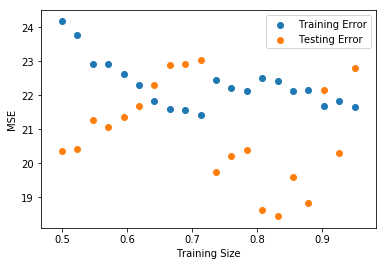

In [31]:
training_error = []
testing_error = []
train_sizes = np.linspace(0.5, 0.95, 20)

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size= 1 - train_size)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_residuals = y_hat_test - y_test
    test_residuals = y_hat_train - y_train
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    training_error.append(train_mse)
    testing_error.append(test_mse)
print(training_error)
print(testing_error)

plt.figure()
plt.scatter(test_sizes, training_error, label='Training Error')
plt.scatter(test_sizes, testing_error, label='Testing Error')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Evaluate the effect of train-test split size: Extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

In [49]:
training_error = []
testing_error = []
avg_train_error = []
avg_test_error = []
train_sizes = np.linspace(0.5, 0.95, 20)
num_iter = np.linspace(0, 100, 101)

for train_size in train_sizes:
    for i in num_iter:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1 - train_size)
        linreg = LinearRegression()
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        train_residuals = y_hat_test - y_test
        test_residuals = y_hat_train - y_train
        train_mse = mean_squared_error(y_train, y_hat_train)
        test_mse = mean_squared_error(y_test, y_hat_test)
        training_error.append(train_mse)
        testing_error.append(test_mse)
    avg_train_error.append(sum(training_error)/len(training_error))
    avg_test_error.append(sum(testing_error)/len(testing_error))

print(avg_train_error)
print(avg_test_error)

[21.45749162525576, 21.38339842544234, 21.461679573750544, 21.369763222536033, 21.42275189132099, 21.434739224381744, 21.440568622584042, 21.45878817420771, 21.494720972055642, 21.502926702099124, 21.514477711189205, 21.53396435322745, 21.53276382334696, 21.541415989907794, 21.540296008162777, 21.543975501427774, 21.547416755034913, 21.556184664258353, 21.563733866309096, 21.563153918356157]
[22.84429059327392, 22.943247515525304, 22.83438108109921, 22.95520525763367, 22.879614360922535, 22.85248529477341, 22.846558378638058, 22.825717787666196, 22.75455940545188, 22.753131271705694, 22.72822632304519, 22.67818595643268, 22.699291630086297, 22.680875244682785, 22.71224380287663, 22.72230820043609, 22.73829685124358, 22.70595269018822, 22.6829582970047, 22.794543948207814]


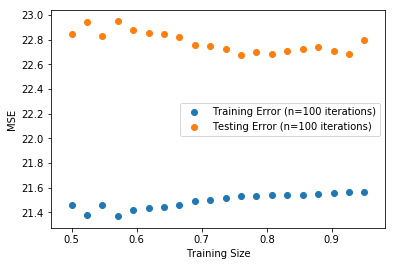

In [50]:
plt.figure()
plt.scatter(train_sizes, avg_train_error, label='Training Error (n=100 iterations)')
plt.scatter(train_sizes, avg_test_error, label='Testing Error (n=100 iterations)')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.legend()
plt.show()

What's happening here? Evaluate your result!

### By performing 100 vs 1 iterations for each training size, we are eliminating the effect of variability in the splits performed by the train_test_split() function, and we see that the MSE for the training dataset is consistently a bit lower than for the testing dataset. Our MSE values for testing do not seem to improve much beyond about a 0.75 training/testing split.

##  Summary 

Congratulations! You now practiced your knowledge on MSE and on using train-test split.